Nombre: David Díaz Paz y Puente | Matrícula: 650794

# A1.3 Solución de problemas y selección de características

## 1. Introducción

Para esta actividad partimos de la idea de que en ciencia de datos casi nunca recibimos conjuntos de datos “listos para usar”: es normal encontrar variables categóricas mal codificadas, escalas inconsistentes, valores atípicos y hasta información redundante entre variables, lo cual puede afectar directamente la calidad y la interpretabilidad de cualquier modelo predictivo. 

Trabajaremos con una base de datos que incluye información demográfica y académica de estudiantes, además de sus calificaciones parciales y final. El objetivo del reporte es construir un modelo de regresión lineal múltiple para predecir la calificación final, enfrentando explícitamente los retos de usar datos reales y justificando la selección de variables explicativas más relevantes. Para lograrlo, se describirá el proceso de exploración, limpieza y transformación de datos, se analizarán relaciones entre variables para detectar colinealidad o redundancia, y finalmente se aplicará un criterio de selección de características que permita quedarse con un subconjunto informativo. Con esas variables seleccionadas, se entrenará y evaluará el modelo comparando su desempeño en entrenamiento y prueba (evitando fuga de datos), y se cerrará con una reflexión crítica sobre limitaciones y posibles mejoras. 

In [17]:
import pandas as pd

ruta = f'calificaciones.csv'
df = pd.read_csv(ruta)

## 2. Metodología

### 2.1 Exploración y comprensión del conjunto de datos

De acuerdo a la fuente, la base de datos utilizada reúne información real de estudiantes de nivel secundaria en dos escuelas de Portugal, y está diseñada para relacionar el desempeño académico con características del estudiante y de su contexto. Se compone de atributos (variables) que incluyen: (1) calificaciones por periodo (G1, G2) y la calificación final del año (G3), (2) datos demográficos (por ejemplo, edad y sexo), (3) factores sociales y familiares (como apoyo en casa o condiciones del entorno), y (4) variables escolares (relacionadas con hábitos o dinámica académica).

In [18]:
print(df.head())
print(df.info())

  Escuela Sexo  Edad  HorasDeEstudio  Reprobadas Internet  Faltas  G1  G2  G3
0      GP    F    18               2           0       no       6   5   6   6
1      GP    F    17               2           0      yes       4   5   5   6
2      GP    F    15               2           3      yes      10   7   8  10
3      GP    F    15               3           0      yes       2  15  14  15
4      GP    F    16               2           0       no       4   6  10  10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Escuela         395 non-null    object
 1   Sexo            395 non-null    object
 2   Edad            395 non-null    int64 
 3   HorasDeEstudio  395 non-null    int64 
 4   Reprobadas      395 non-null    int64 
 5   Internet        395 non-null    object
 6   Faltas          395 non-null    int64 
 7   G1              395 non-nu

A partir del resumen del dataframe, se identifica que el dataset está compuesto por 395 observaciones y 10 variables, donde cada registro representa a un estudiante con características académicas, personales y de contexto escolar. Esta primera revisión permite clasificar las variables según su naturaleza, lo cual es clave para decidir cómo tratarlas dentro de un modelo de regresión lineal. A continuación se presenta la descripción para cada variable de acuerdo a la fuente de la base de datos ([archive.ics.uci.edu](https://archive.ics.uci.edu/dataset/320/student+performance)):

| Variable Name | Role | Type | Descripction |
|-----------|-----------|-----------|-----------|
| school | Feature | Categorical | student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) | 
| sex | Feature | Binary | student's sex (binary: 'F' - female or 'M' - male) |
| age | Feature | Integer |  student's age (numeric: from 15 to 22)  |
| studytime | Feature | Integer   | weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) |
| failures | Feature | Integer   | number of past class failures (numeric: n if 1<=n<3, else 4) |
| internet | Feature | Binary   | Internet access at home (binary: yes or no)
| absences | Feature | Integer   | number of school absences (numeric: from 0 to 93) |
| G1 | Target | Categorical |   first period grade (numeric: from 0 to 20) |
| G2 | Target | Categorical |   second period grade (numeric: from 0 to 20) |
| G3 | Target | Categorical |   final grade (numeric: from 0 to 20, output target) |


Por un lado, se tienen variables cuantitativas discretas como Edad, HorasDeEstudio, Reprobadas, Faltas, G1, G2 y G3, que pueden incorporarse directamente al modelo porque ya están en formato numérico. Estas variables son candidatas naturales a explicar la calificación final, ya que miden comportamientos o antecedentes académicos que pueden tener relación directa con el rendimiento.

Por otro lado, existen variables cualitativas nominales como Escuela, Sexo e Internet, que no poseen un orden numérico. Estas no pueden introducirse directamente en una regresión lineal, por lo que requieren codificación previa (por ejemplo, variables dummy u one-hot encoding). Este proceso incrementa el número de variables y puede añadir complejidad al modelo. Además, es necesario evaluar si realmente aportan información relevante o solo ruido estadístico.

Finalmente, de acuerdo a la función `info()`, no existan valores faltantes, lo que simplifica el preprocesamiento, ya que no será necesario imputar datos ni eliminar registros, permitiendo centrar el esfuerzo en análisis de correlaciones, detección de redundancias y selección de características. 

### 2.2 Preparación y Limpieza de Datos

Como fue mencionado, contamos con 3 variables de índole cualitativo; Escuela, Sexo e Internet. La variable Internet, como se menciona en la tabla de la fuente, es de tipo binaria, mientras que las variables Escuela y Sexo son categóricas. Adicionalmente, gracias a la funión `info()` podemos ver el tipo de cada variable que compone el dataframe, en este caso estas 3 variables cualitativas son de tipo _objeto_ a comparación de las variables cuantitativas que son de tipo _int8_.

Para la preparación y limpieza de datos se generarán variables dummy para representar y reemplazar a las columnas que componen las variables cualitativas de interés. 

In [19]:
import pandas as pd

cat_cols = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(df.head())
print(df.info())


   Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
0    18               2           0       6   5   6   6       False   False   
1    17               2           0       4   5   5   6       False   False   
2    15               2           3      10   7   8  10       False   False   
3    15               3           0       2  15  14  15       False   False   
4    16               2           0       4   6  10  10       False   False   

   Internet_yes  
0         False  
1          True  
2          True  
3          True  
4         False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Edad            395 non-null    int64
 1   HorasDeEstudio  395 non-null    int64
 2   Reprobadas      395 non-null    int64
 3   Faltas          395 non-null    int64
 4   G1              395 non-null    int64
 5   G2    

De acuerdo al nuevo resumen de los datos por la función `info()`, los datos para la variable Internet son ahora representados en valores tipo bool mediante la nueva variable de interés Internet_yes, donde el valor de la muestra es 'true' si cuenta con acceso a internet en casa y 'false' de lo contrario. Para las variables categóricas Escuela y Sexo, se generaron las variables dummy Escuela_MS y Sexo_M para representarlas respectivamente; para la variable Escuela_MS, 'true' significa asiste a la escuela Mousinho da Silveira y 'false' corresponde a la asistencia a la escuela Gabriel Pereira; para la variable Sexo_M, 'true' significa masculino y 'false' femenino. Los tipos _int8_ y _bool_ serán tratados de manera indistinta. 

### 2.3 Análisis de relaciones entre variables

En esta sección, se presenta un análisis detallado de las relaciones entre las variables explicativas del conjunto de datos, con el objetivo de identificar posibles problemas de colinealidad o redundancia de información. Para ello, se calcula y visualiza la matriz de correlación entre las variables numéricas, lo que nos permite observar la intensidad de las relaciones lineales entre ellas. La matriz de correlación muestra cómo se interrelacionan las variables, y destaca especialmente las correlaciones fuertes, como la observada entre G1 y G2, que están estrechamente relacionadas con G3. 

Además, se realiza un análisis gráfico utilizando diagramas de dispersión (`pairplot`), que facilita la visualización de la distribución de las variables y sus interacciones. Este enfoque permite reflexionar sobre si algunas variables deben ser eliminadas antes de entrenar el modelo, ya que variables altamente correlacionadas pueden generar multicolinealidad, afectando la precisión y la interpretabilidad del modelo de regresión.

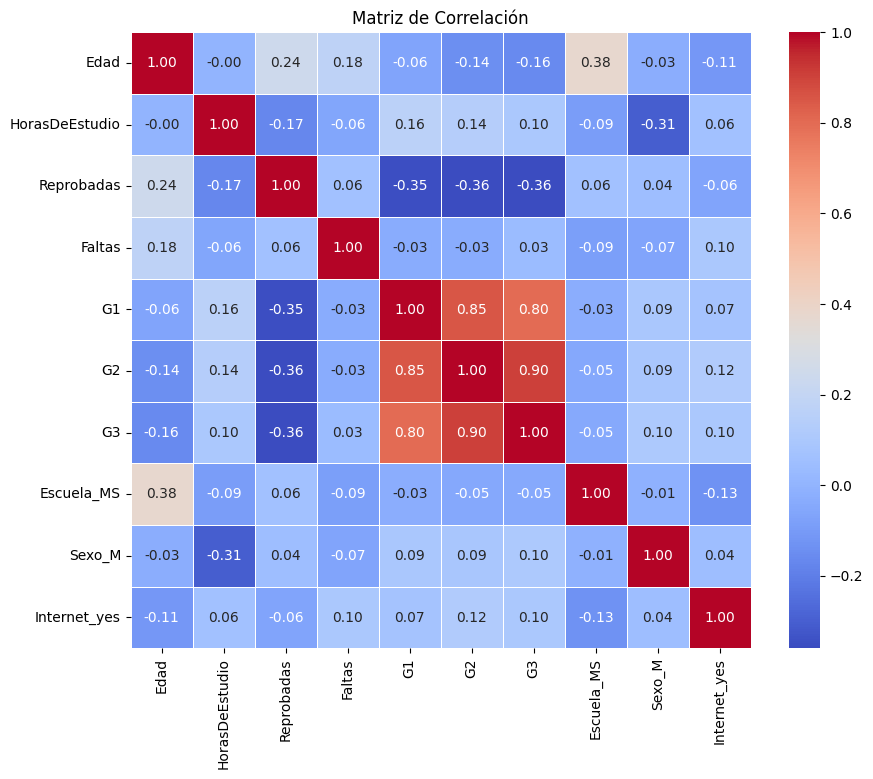

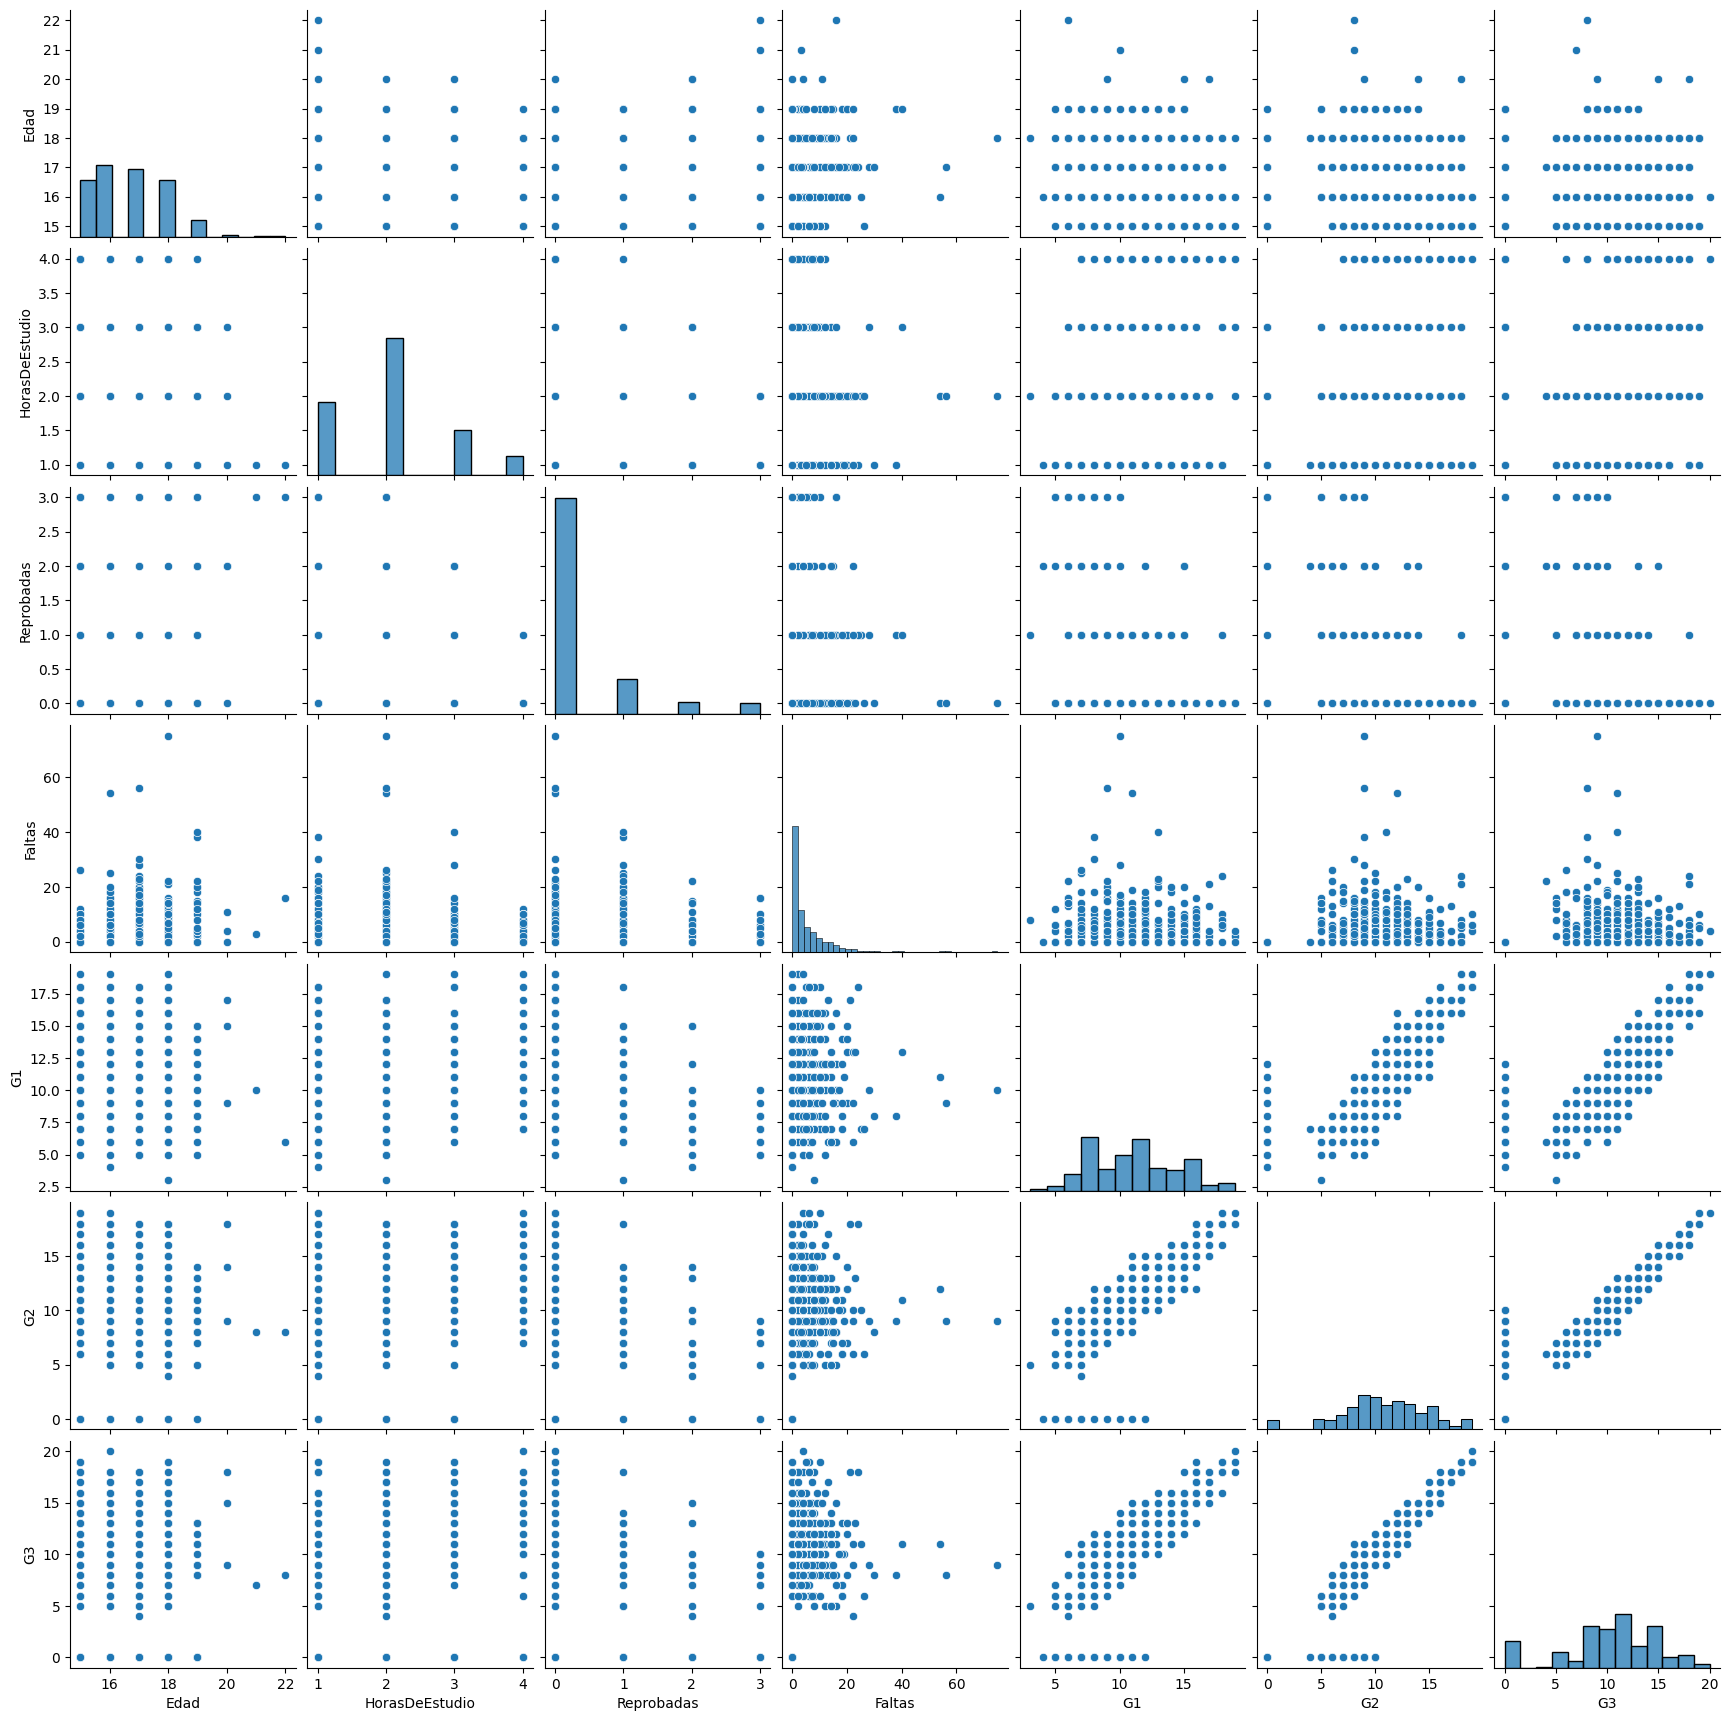

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Graficas de relaciones entre variables
sns.pairplot(df[['Edad', 'HorasDeEstudio', 'Reprobadas', 'Faltas', 'G1', 'G2', 'G3']])
plt.show()

Tanto en la matriz de correlación obtenida como en los diagramas de dispersión, se destacan las relaciones más fuertes, especialmente entre las calificaciones de los diferentes periodos (G1, G2, y G3), las cuales tienen una alta correlación entre sí, lo que sugiere que podría haber redundancia en la información. 

Dado el análisis realizado, se procederá a eliminar la variable G1 en el diseño del modelo. Esta decisión se toma considerando que, en la matriz de correlación, se observa una relación más fuerte entre G2 y G3, lo que sugiere que G2 aporta mayor valor predictivo para la calificación final y, por lo tanto, se considera más relevante para el modelo.

In [21]:
df = df.drop(columns=["G1"])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Edad            395 non-null    int64
 1   HorasDeEstudio  395 non-null    int64
 2   Reprobadas      395 non-null    int64
 3   Faltas          395 non-null    int64
 4   G2              395 non-null    int64
 5   G3              395 non-null    int64
 6   Escuela_MS      395 non-null    bool 
 7   Sexo_M          395 non-null    bool 
 8   Internet_yes    395 non-null    bool 
dtypes: bool(3), int64(6)
memory usage: 19.8 KB
None


### 2.4 Selección de características 

En este caso, se utilizó el modelo Lasso, que aplica una regularización para penalizar las variables menos significativas, eliminándolas automáticamente del modelo. Esta técnica ayuda a reducir la colinealidad y la redundancia de las características, mejorando la eficiencia y generalización del modelo. La selección se complemente con validación cruzada para seleccionar el valor óptimo de 𝜆 (alpha). Los coeficientes calculados por Lasso (como `lasso_cv.coef_`) indican la contribución de cada variable predictora, como Edad, HorasDeEstudio, G1, etc., en la predicción de la calificación final G3. Este enfoque no solo selecciona las variables más relevantes para el modelo, sino que también asegura que el modelo mantenga su capacidad predictiva sin ser afectado por variables redundantes.

A continuación, se describe el proceso de selección de las características más influyentes, basado en el valor de los coeficientes y su contribución al rendimiento del modelo.

In [37]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar la variable objetivo y las características
X = df.drop(columns=["G3"])
y = df["G3"]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar LassoCV (selección automática de alpha mediante validación cruzada)
lasso_cv = LassoCV(cv=5)  # 5 pliegues de validación cruzada
lasso_cv.fit(X_train_scaled, y_train)

# Mostrar el mejor valor de alpha (𝜆) seleccionado
print("Mejor valor de alpha (𝜆) seleccionado por LassoCV:", lasso_cv.alpha_)

# Mostrar coeficientes seleccionados por Lasso
coef_dict = dict(zip(X.columns, lasso_cv.coef_))

# Mostrar los coeficientes asociados a cada variable
print("\nCoeficientes seleccionados por Lasso:")
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef}")

# Filtrar las variables con coeficientes no nulos (variables seleccionadas)
selected_features = [feature for feature, coef in coef_dict.items() if coef != 0]
print("\nVariables seleccionadas por Lasso:", selected_features)


Mejor valor de alpha (𝜆) seleccionado por LassoCV: 0.06324468344657062

Coeficientes seleccionados por Lasso:
Edad: -0.11826799288309152
HorasDeEstudio: 0.0
Reprobadas: -0.29519773272319666
Faltas: 0.2955818227020614
G2: 3.984184876160977
Escuela_MS: -0.0
Sexo_M: 0.07371776888390866
Internet_yes: -0.009624021985041234

Variables seleccionadas por Lasso: ['Edad', 'Reprobadas', 'Faltas', 'G2', 'Sexo_M', 'Internet_yes']


Entre las variables que fueron seleccionadas y conservadas en el modelo, algunas tienen coeficientes positivos (como 0.2955, 3.9841 y 0.0737), lo que indica que un aumento en estas características (Faltas, G2, Sexo_M, respectivamente) se asocia con un incremento en G3. Otras, con coeficientes negativos (-0.1182, -0.2951, -0.0096), muestran que a medida que estas variables aumentan (Edad, Reprobadas, Internet_yes, respectivamente), la calificación final disminuye.

### 2.5 Entrenamiento y evaluación del modelo

En esta sección, se entrenará un modelo de regresión lineal múltiple utilizando exclusivamente las variables seleccionadas previamente mediante el proceso de regularización Lasso. El objetivo es construir un modelo predictivo capaz de estimar la calificación final G3 a partir de las características seleccionadas, evitando la presencia de variables redundantes o irrelevantes.


Métricas de evaluación:
MSE en entrenamiento: 3.43
MSE en prueba: 4.48
R² en entrenamiento: 0.84
R² en prueba: 0.78


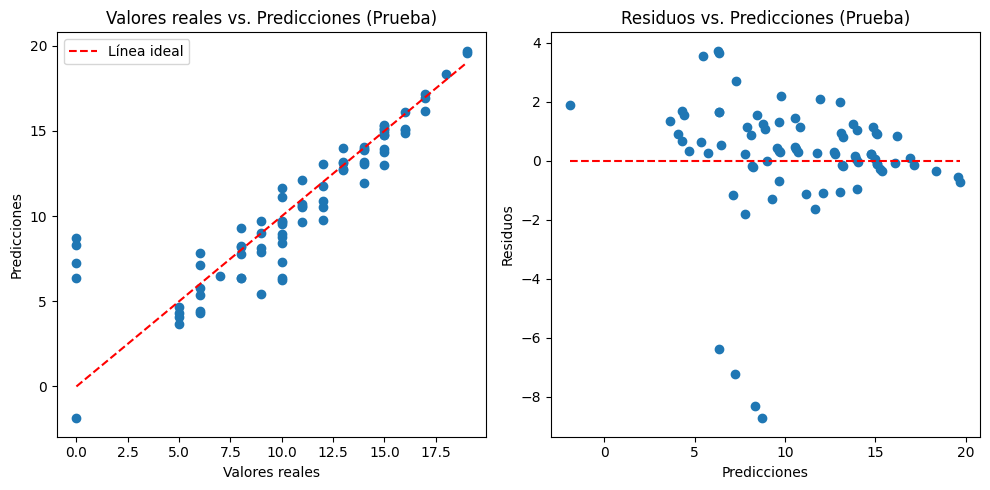

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones en el conjunto de prueba
y_test_pred = lasso_cv.predict(X_test_scaled)
y_train_pred = lasso_cv.predict(X_train_scaled)

# Calcular métricas de desempeño: MSE y R²
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Mostrar las métricas de desempeño
print("\nMétricas de evaluación:")
print(f"MSE en entrenamiento: {mse_train:.2f}")
print(f"MSE en prueba: {mse_test:.2f}")
print(f"R² en entrenamiento: {r2_train:.2f}")
print(f"R² en prueba: {r2_test:.2f}")

# Visualización: comparación entre valores reales y predicciones
plt.figure(figsize=(10, 5))

# Graficar los valores reales frente a las predicciones para los datos de prueba
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Línea ideal')
plt.title("Valores reales vs. Predicciones (Prueba)")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.legend()

# Graficar los residuos (diferencia entre predicción y valor real)
residuals = y_test - y_test_pred
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals)
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), color='r', linestyle='--')
plt.title("Residuos vs. Predicciones (Prueba)")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")

plt.tight_layout()
plt.show()



El Error Cuadrático Medio (MSE) tanto para el entrenamiento como para la prueba muestran ser bajos; la diferencia promedio entre los valores reales y las predicciones del modelo es relativamente poca, lo que significa que las predicciones están cerca de los valores reales. El MSE del conjunto de prueba indica que el modelo tiene un ligeramente mayor error en la predicción de los datos de prueba. Esto es normal y esperado, ya que el modelo generalmente tiene un rendimiento ligeramente peor en los datos no vistos.

El coeficiente de determinación R² mide qué tan bien el modelo explica la variabilidad de la variable dependiente (G3) con base en las variables independientes. Un R² de 0.84 en entrenamiento significa que el modelo explica el 84% de la variabilidad de la calificación final en los datos de entrenamiento. Esto es un buen indicador de que el modelo se ajusta bien a los datos de entrenamiento. En prueba indica que el modelo explica el 78% de la variabilidad en los datos de prueba. Aunque es ligeramente más bajo que el R² en entrenamiento (0.84), sigue siendo un buen desempeño para un modelo predictivo.

## 3. Conclusiones y reflexiones

### 3.1 Reflexión

El modelo generado en base a la regularización Lasso muestra relaciones que considieraría contraintuitivas, como por ejemplo: incrementar el número de faltas en promedio aumentaría (poco) tus probabilidades de obtener una mayor calificación final. Otro ejemplo es que dentro de los coeficientes seleccionados no se encuentra la variable explicativa de HorasDeEstudio, y una razón a esto la podemos ver incluso dentro de la matriz de correlación donde la correlacionalidad entre la variable HorasDeEstudio es muy baja en relación a otras. 

Finalmente, cada una de las variables tiene un impacto diferente en la calificación final (G3). El modelo Lasso ha identificado que algunas características positivas (como las calificaciones de los periodos anteriores) contribuyen significativamente a una mayor calificación final, mientras que otras variables negativas (como la edad y las materias reprobadas) están asociadas con un rendimiento más bajo. El impacto de características como sexo o acceso a Internet sugiere que el contexto educativo y social de cada estudiante juega un papel importante en el desempeño académico.

### 3.2 Conclusión

El proceso de análisis realizado ha permitido construir un modelo de regresión lineal múltiple con regularización Lasso para predecir la calificación final (G3) de los estudiantes. A través de la preparación de datos y la selección de características realizadas, hemos logrado mejorar la precisión del modelo al eliminar variables irrelevantes y reducir la complejidad del modelo. La regularización Lasso permitió seleccionar de manera eficiente las variables más relevantes, evitando problemas de multicolinealidad y sobreajuste, lo que resultó en un modelo más robusto y con mejor capacidad de generalización.

La preparación de los datos juega un papel fundamental en el éxito del análisis. La normalización de las características fue esencial para garantizar que todas las variables estuvieran en la misma escala, lo que es particularmente importante en modelos de regularización como Lasso. Además, la división adecuada entre conjuntos de entrenamiento y prueba, junto con la validación cruzada, contribuyó a evitar la fuga de datos y a evaluar el modelo de manera más confiable.

En conclusión, este proceso ha proporcionado valiosos aprendizajes sobre cómo construir y evaluar modelos predictivos, y la importancia de realizar un análisis detallado y riguroso durante todas las etapas, desde la preparación de los datos hasta la evaluación del modelo. Las limitaciones actuales brindan una excelente oportunidad para seguir mejorando y explorando nuevas técnicas que fortalezcan el modelo en el futuro.